In [1]:
# all modules necessary for this nb
import os
import sys
import pickle
from collections import Counter

import numpy as np
import pylab as pl
import scipy.stats as sstats
import pandas as pd
from matplotlib.lines import Line2D

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')

In [3]:
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
NOTEBOOK_NAME = 'breath'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'calc_rho', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'peakdet', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'plot_breathing_heatmap', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'read_respiration_times', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'extract_resp_rate', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'load_rates', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [28]:
#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

In [29]:
#post data only
vhpc_animals = 'c18m9','vNAc7','94', '96', '100', '98', '99', '104'
dhpc_animals = 'dhpc40','dhpc37', 'dhpc39', 'dNAc3'


all_animals = vhpc_animals + dhpc_animals
print all_animals

('c18m9', 'vNAc7', '94', '96', '100', '98', '99', '104', 'dhpc40', 'dhpc37', 'dhpc39', 'dNAc3')


# Single animal

In [30]:
def peakdet(v, delta=0.02, x = None):
    """
    Converted from MATLAB script at http://billauer.co.il/peakdet.html
    
    Returns two arrays
    
    function [maxtab, mintab]=peakdet(v, delta, x)
    %PEAKDET Detect peaks in a vector
    %        [MAXTAB, MINTAB] = PEAKDET(V, DELTA) finds the local
    %        maxima and minima ("peaks") in the vector V.
    %        MAXTAB and MINTAB consists of two columns. Column 1
    %        contains indices in V, and column 2 the found values.
    %      
    %        With [MAXTAB, MINTAB] = PEAKDET(V, DELTA, X) the indices
    %        in MAXTAB and MINTAB are replaced with the corresponding
    %        X-values.
    %
    %        A point is considered a maximum peak if it has the maximal
    %        value, and was preceded (to the left) by a value lower by
    %        DELTA.
    
    % Eli Billauer, 3.4.05 (Explicitly not copyrighted).
    % This function is released to the public domain; Any use is allowed.
    
    """
    maxtab = []
    mintab = []
       
    if x is None:
        x = np.arange(len(v))
    
    v = np.asarray(v)
    
    if len(v) != len(x):
        raise Exception('Input vectors v and x must have same length')
    
    if not np.isscalar(delta):
        raise Exception('Input argument delta must be a scalar')
    
    if delta <= 0:
        raise Exception('Input argument delta must be positive')
    
    mn, mx = np.Inf, -np.Inf
    mnpos, mxpos = np.NaN, np.NaN
    
    lookformax = True
    
    for i in np.arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True

    return np.array(maxtab), np.array(mintab)

In [31]:
def read_respiration_times(filename, **args):
    """
    Reads respiration times from a csv file (see breathing.ipynb).
    It uses peak detection to determine respiration times.
    Arguments: csv filename, arguments for peakdet.
    Returns: time, voltage value, respiration events, respiration rate.
    See also: peakdet function.
    """
    voltage = pd.read_csv(filename, index_col=0)
    voltage.index = voltage.index*1e-3
    voltage.index.name = 'Time (s)'
    a,b = peakdet(voltage.values, **args)
    
    respiration = np.zeros(len(voltage))
    idxs = np.array(a[:, 0].astype(int))
    respiration[idxs]=1
    
    resp_rate_ = 1./np.diff(voltage.index.values[respiration>0])
    
    respiration = np.zeros(len(voltage))
    idxs = np.array(a[:, 0].astype(int))
    respiration[idxs[1:]]=1
    
    return (voltage.index.values, voltage.values.flatten(),
            respiration, resp_rate_, a,b)

In [32]:
animal = '98'
for var in 'time_ax', 'STIM1_ons','STIM2_ons','STIM3_ons','STIM4_ons':
    exec("%s = ut.load_variable('%s', '../%s/post/notebooks/autorestore/preprocessing')"%(var, var, animal))
    
#Cycle00001_VoltageRecording_001.csv
   
time_ax_val=[]
voltage = []
respiration = []
resp_rate_ = []
a=[]
b=[]
id_range = ['00001','00002','00003','00004','00005','00006','00007','00008','00009','00010',
            '00011','00012','00013','00014','00015','00016','00017','00018','00019','00020',
            '00021','00022','00023','00024','00025','00026','00027','00028','00029','00030',
            '00031','00032','00033','00034','00035','00036','00037','00038','00039','00040',
            '00041','00042','00043','00044','00045','00046','00047','00048','00049','00050',
            '00051','00052','00053','00054','00055','00056','00057','00058','00059','00060',
            '00061','00062','00063','00064','00065','00066','00067','00068','00069','00070',
            '00071','00072','00073','00074','00075','00076','00077','00078','00079','00080',
            '00081','00082','00083','00084','00085','00086','00087','00088','00089','00090',
            '00091','00092','00093','00094','00095','00096','00097','00098','00099','00100',
            '00101','00102','00103','00104','00105','00106','00107','00108','00109','00110',
            '00111','00112','00113','00114','00115','00116','00117','00118','00119','00120',]

exec("data_folder = '../%s/post/data'"%(animal))

c ='Cycle'
d= '_VoltageRecording_001.csv'

for i in id_range:
    for file in os.listdir(data_folder):
        ending = c+i+d
        if file.endswith(ending):
            csvfile = data_folder + '/' + file
    
    exec("time_ax_val_t, voltage_t, respiration_t, resp_rate__t,a_t,b_t = read_respiration_times('%s')"%(csvfile))
    time_ax_val.append(time_ax_val_t)
    voltage.append(voltage_t)
    #breaths = [respiration_t>0][1:]
    #respiration_t = respiration_t[breaths]
    respiration.append(respiration_t)
    resp_rate_.append(resp_rate__t)
    a.append(a_t)
    b.append(b_t)


resp_rate_ = [item for sublist in resp_rate_ for item in sublist]
respiration = [item for sublist in respiration for item in sublist]
voltage = [item for sublist in voltage for item in sublist]

time_ax_val_n = []
for i in range(len(time_ax_val)*len(time_ax_val[0])):
    time_ax_val_n.append(i*1.4*time_ax_val[0][1])

In [33]:
rate_around_onset_csm

[array([[  7.70928044,   5.82726257,   3.88563818, ...,   3.4093901 ,
           8.39500929,  10.01539027],
        [  5.69603979,   3.99951549,   3.26507253, ...,   7.79412559,
           6.10077535,   4.3389084 ],
        [  2.18231568,   1.57389731,   1.48272868, ...,   6.45980009,
           4.63494784,   6.87128136],
        ..., 
        [  2.34275905,   2.24850161,   2.01021516, ...,   2.48385491,
           1.89871428,   2.0598693 ],
        [  6.91696152,   7.07917452,   9.81864404, ...,   3.73966741,
           2.96554307,   2.19141873],
        [  5.92349662,   7.95536919,   6.06208806, ...,   4.46409492,
           4.49041872,   3.51557932]])]

In [34]:
def plot_breathing_heatmap(breathing_around_onset, onset, colorbar_label=None, cmap=None,
                           vmax=None, vmin=None, colorbar=True, xlabel=True, ylabel=True, vline_color='r', ax=None):
    if ax is None:
        fig, ax = pl.subplots(1, 1)
    if cmap is None:
        cmap = pl.cm.viridis
    
    im = ax.imshow(breathing_around_onset, aspect='auto', extent=(-3, 5, 0, len(onset)), origin='lower',
                   vmax=vmax, vmin=vmin, cmap=cmap)
    ax.vlines(0, 0, len(onset), color=vline_color)
    if xlabel:
        ax.set_xlabel("Time from Odor Onset (s)")
    if colorbar:
        cax = ax.figure.add_axes((1, 0.2, 0.02, 0.6))
        pl.colorbar(im, cax=cax)
    #     cax.set_ylabel('mV')
        if colorbar_label is not None:
            cax.set_ylabel(colorbar_label)

    if ylabel:
        ax.set_ylabel('Trial #')
    
    return ax

In [35]:
csp_ons

array([    5.97532841,   121.70347539,   168.01355341,   192.68201075,
         235.29373206,   307.70828598,   332.15274561,   377.84479097,
         398.38074274,   490.49977348,   613.30684717,   635.2677913 ,
         710.52653327,   733.46982058,   755.50193408,   802.30095884,
         825.40151989,   848.36098196,   938.92001286,  1007.27495753,
        1027.52907141,  1051.24498318,  1075.70405768,  1217.68409779,
        1243.54299827,  1269.1800734 ,  1294.72998372,  1317.14009363,
        1338.10904319,  1362.96912363,  1454.23116447,  1475.48910467,
        1495.65086261,  1538.21624343,  1581.20925644,  1606.80613904,
        1734.52252498,  1757.97210521,  1784.33118326,  1835.02319302,
        1902.62818305,  1948.11920561,  1971.45429348,  2090.01623452,
        2132.48727817,  2152.6483869 ,  2174.55831055,  2197.00339178,
        2266.98095271,  2362.60444186,  2388.06034859,  2410.82844658,
        2480.11339084,  2504.16447402,  2530.50752821,  2556.94642927,
      

In [36]:
len(rate_around_onset_csp[0])


60

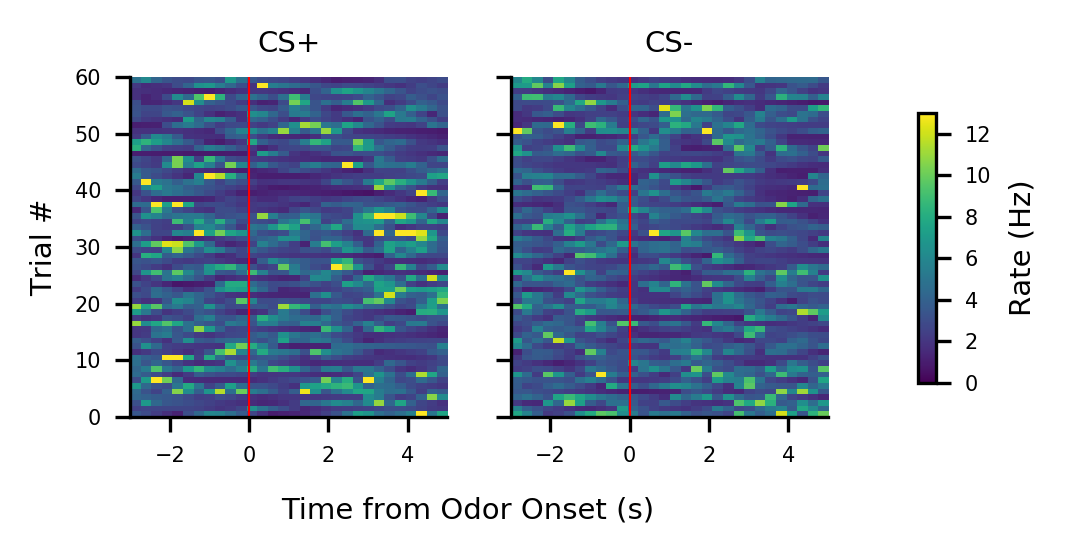

In [37]:
resp_rate = np.interp(time_ax, np.array(time_ax_val_n)[np.array(respiration)>0], resp_rate_)

rate_around_onset_csp=[]
rate_around_onset_csm=[]

csp_ons = np.sort(np.r_[STIM1_ons, STIM2_ons])
csm_ons = np.sort(np.r_[STIM3_ons, STIM4_ons])

rate_around_onset_csp.append(ut.extract_traces_around_event(time_ax, resp_rate, csp_ons, 3, 5))

rate_around_onset_csm.append(ut.extract_traces_around_event(time_ax, resp_rate, csm_ons, 3, 5))

fig, axs = pl.subplots(1, 2, figsize=(3, 1.5), sharey=True)
plot_breathing_heatmap(rate_around_onset_csp[0], csp_ons, colorbar_label='Rate (Hz)', vmax=13, vmin=0,
                            colorbar=True, xlabel=False, ax=axs[0])
plot_breathing_heatmap(rate_around_onset_csm[0], csm_ons, colorbar_label='Rate (Hz)', vmax=13, vmin=0,
                            colorbar=False, xlabel=False, ylabel=False, ax=axs[1])

axs[0].set_title('CS+')
axs[1].set_title('CS-')

fig.text(0.5, -0.1, "Time from Odor Onset (s)", ha='center', fontsize=7)

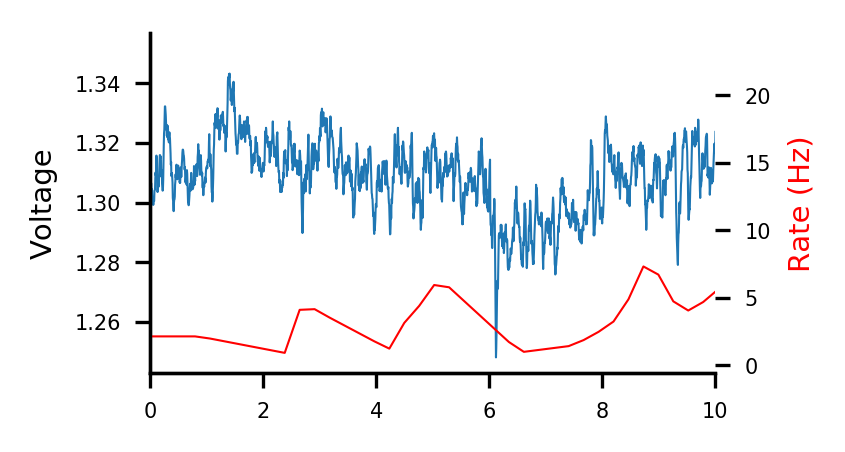

In [38]:
pl.plot(time_ax_val_t[::10], voltage_t[::10], '-', mew=0, ms=2)
pl.ylabel('Voltage')

pl.twinx()
pl.plot(time_ax, resp_rate, 'r-')
pl.ylabel("Rate", color='r')

pl.xlim(0, 10)

pl.xlabel('Time (s)')
pl.ylabel('Rate (Hz)', color='r')

(0, 10)

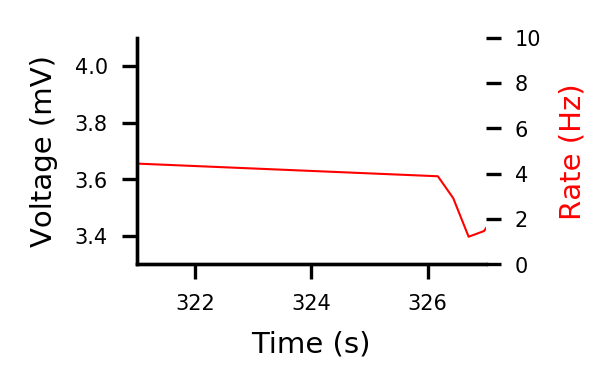

In [39]:
# odor_onset = odor1_ons[3]
# t_start = odor_onset-3
# t_stop = odor_onset+8

t_start = 321
t_stop = 327

fig, ax = pl.subplots(1, 1, figsize=(1.5, 1))

ax.plot(time_ax_val_n[::10], voltage[::10], '-', mew=0, ms=2)
ax.set_ylabel('Voltage (mV)')

ax.set_ylim(3.3, 4.1)

# pt.plot_period_bar(ax, 3, delta_y=1.5, alpha=0.2, start_end=(odor_onset, odor_onset+4), zorder=0, color='0.5')
ax.set_xlabel('Time (s)')

ax = ax.twinx()
ax.plot(time_ax, np.convolve(resp_rate, np.ones(5)/5., mode='same'), 'r-')
# pl.ylabel("Rate", color='r')

ax.set_xlim(t_start, t_stop)

ax.set_ylabel('Rate (Hz)', color='r')

ax.set_ylim(0, 10)

#ax.figure.savefig('../img/breath_example_voltage_breathing_rate.pdf', bbox='tight')

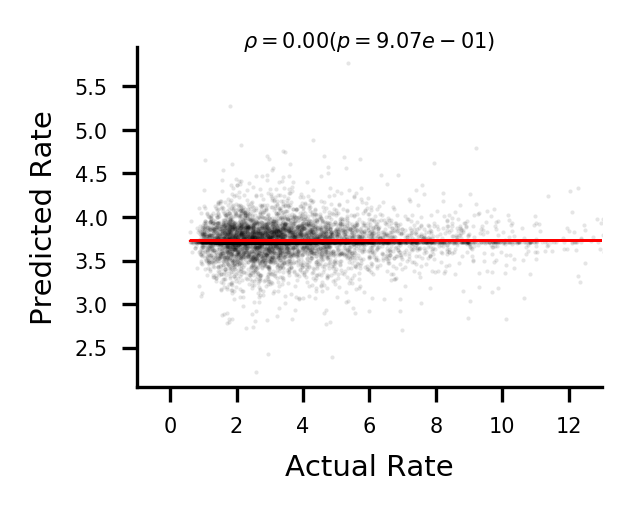

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

y_preds = ut.load_variable('y_preds', '../%s/post/notebooks/autorestore/breath_cells'%animal)

fig, ax = pl.subplots(1, 1, figsize=(2, 1.5))
ax.plot(resp_rate, y_preds, 'ko', ms=1, mew=0, alpha=0.1)
ax.plot(resp_rate, lr.fit(resp_rate.reshape([-1, 1]), y_preds).predict(resp_rate.reshape([-1, 1])), 'r-', lw=0.5)
pt.nicer_plot(ax)
ax.set_xlim(-1, 13)
# ax.set_ylim(2, 5)

ax.set_xlabel('Actual Rate')
ax.set_ylabel('Predicted Rate')

p = sstats.pearsonr(resp_rate, y_preds)

ax.text(0.5, 1, r"$\rho=%.2lf (p=%.2e)$"%p, ha='center', transform=ax.transAxes)

#ax.figure.savefig('../img/breath_predicted_rate.pdf', bbox='tight')

In [41]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, LeaveOneGroupOut

## All animals

In [42]:
def calc_rho(animal, session='breath'):
    for var in 'events', 'time_ax', 'cycles', 'CYCLE_START', 'CS_DURATION','STIM1_ons','STIM2_ons','STIM3_ons','STIM4_ons','is_STIM1t','is_STIM2t','is_STIM3t','is_STIM4t','y_preds','resp_rate':
        exec("%s = ut.load_variable('%s', '../%s/post/notebooks/autorestore/breath_cells')"%(var, var, animal))
   
    scores=[]
    lr = Lasso()
    cv = LeaveOneGroupOut()
    
    groups = np.repeat(np.arange(n_chunks), len(events)/n_chunks+1)[:len(events)]
    scores.append(cross_val_score(lr, events, resp_rate,
                                              cv=10))
    scores=np.mean(scores)
    return scores

In [43]:
def calc_rho_orig(animal, session='breath'):
    for var in 'events', 'time_ax', 'cycles', 'CYCLE_START', 'CS_DURATION','STIM1_ons','STIM2_ons','STIM3_ons','STIM4_ons','is_STIM1t','is_STIM2t','is_STIM3t','is_STIM4t','y_preds','resp_rate':
        exec("%s = ut.load_variable('%s', '../%s/post/notebooks/autorestore/breath_cells')"%(var, var, animal))
    
    
    from sklearn.linear_model import LinearRegression

    lr = LinearRegression()


    return sstats.pearsonr(resp_rate, y_preds)

In [44]:
rhos_vhpc = [calc_rho(animal) for animal in vhpc_animals]
rhos_dhpc = [calc_rho(animal) for animal in dhpc_animals]

NameError: name 'n_chunks' is not defined

In [45]:
rhos_vhpc

[(0.07030255257390515, 5.9522774436989021e-10),
 (0.1072704345472946, 2.9880060949296814e-21),
 (0.050353173961674665, 9.322578431613681e-06),
 (0.080193593765157029, 1.6009061558460635e-12),
 (0.064533719725530111, 1.3244962119404292e-08),
 (0.079700231085774703, 2.189526378247853e-12),
 (0.10306470532940465, 9.8946265531925492e-20),
 (0.1079725267686652, 1.6432637331025248e-21)]

In [46]:
rhos_dhpc

[(0.22823556682797522, 5.0995197439433262e-92),
 (0.22595002543340906, 3.5559996615236823e-90),
 (0.18294976044507011, 3.0431974265652636e-59),
 (0.24466454227371079, 2.8391191614774491e-105)]

In [47]:
rhos_vhpc_orig = [calc_rho_orig(animal) for animal in vhpc_animals]
rhos_dhpc_orig = [calc_rho_orig(animal) for animal in dhpc_animals]

In [48]:
rhos_vhpc_orig

[(0.07030255257390515, 5.9522774436989021e-10),
 (0.1072704345472946, 2.9880060949296814e-21),
 (0.050353173961674665, 9.322578431613681e-06),
 (0.080193593765157029, 1.6009061558460635e-12),
 (0.064533719725530111, 1.3244962119404292e-08),
 (0.079700231085774703, 2.189526378247853e-12),
 (0.10306470532940465, 9.8946265531925492e-20),
 (0.1079725267686652, 1.6432637331025248e-21)]

In [49]:
rhos_dhpc_orig

[(0.22823556682797522, 5.0995197439433262e-92),
 (0.22595002543340906, 3.5559996615236823e-90),
 (0.18294976044507011, 3.0431974265652636e-59),
 (0.24466454227371079, 2.8391191614774491e-105)]

MannwhitneyuResult(statistic=0.0, pvalue=0.0084748018921538323)

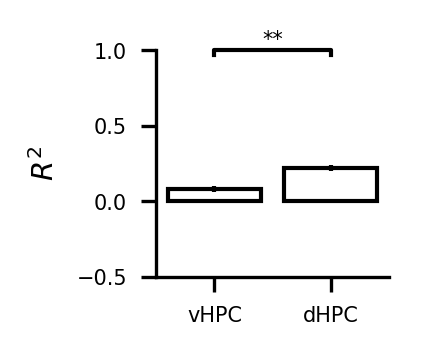

In [50]:
fig, ax = pl.subplots(1, 1, figsize=(1., 1), sharex=True, sharey=True)
values = [[r[0] for r in rhos_vhpc_orig], [r[0] for r in rhos_dhpc_orig]]
pt.plot_bars(values, ax=ax)

ax.set_ylim(-0.5, 1)
ax.set_xlim(-0.5, 1.5)

ax.set_xticks(np.arange(2))
ax.set_xticklabels(['vHPC', 'dHPC'])

ax.set_ylabel(r'$R^2$')

pvs = []
pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 1))

stat_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
stat_func(values[0],values[1])

# axs[0].text(1, 0.5, u"☆", fontsize=5, color='r', ha='center')
# fig.savefig('../img/%s__DGvsLEC_breath_r2_means.pdf'%NOTEBOOK_NAME, bbox='tight')

In [51]:
def plot_it(ax, xpos, values, color='k', errs=False):
    vals = [[vv for vv in v if vv>-1e10] for v in values]
    [ax.plot(np.random.rand(len(v))*0.2+x-0.1, v, 'o', mew=0.5, mfc=(0,0,0,0), mec=color, ms=2)
     for x, v in zip(xpos, vals)]
    m = [np.mean(v) for v in vals]
    s = [sstats.sem(v) for v in vals]
    ax.plot(xpos, m, '_', ms=8, lw=0.5, color=color)
    if errs:        
        ax.errorbar(xpos, m, s, lw=0, elinewidth=0.5, color=color)
        

In [52]:
def report_stats (array1, array2, sig_func=None,mcc=1,loops=None):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        p = sig_func(array1, array2)[-1]
        print "U =",U,"p =",p*mcc,"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        p = sig_func(array1, array2)[-1]
        print sig_func(array1, array2),"d =", cohens_d, 'corrected p =',p*mcc

def report_stats_chance (array1, chance=0.5, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

In [53]:
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001)):
    if sig_func is None:
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=1, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+deltay,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=5)
    return sig_value, p

In [72]:
values_vhpc =  np.r_[rhos_vhpc]
values_dhpc =  np.r_[rhos_dhpc]
print values_dhpc,values_dhpc[:,1]
report_stats(values_vhpc[:,1], values_dhpc[:,1],sig_func='ttest')

[[  2.28235567e-001   5.09951974e-092]
 [  2.25950025e-001   3.55599966e-090]
 [  1.82949760e-001   3.04319743e-059]
 [  2.44664542e-001   2.83911916e-105]] [  5.09951974e-092   3.55599966e-090   3.04319743e-059   2.83911916e-105]
Ttest_indResult(statistic=0.69123626880505795, pvalue=0.50514673492940876) d = 0.535429311475 corrected p = 0.505146734929


In [57]:
rhos_vhpc

[(0.07030255257390515, 5.9522774436989021e-10),
 (0.1072704345472946, 2.9880060949296814e-21),
 (0.050353173961674665, 9.322578431613681e-06),
 (0.080193593765157029, 1.6009061558460635e-12),
 (0.064533719725530111, 1.3244962119404292e-08),
 (0.079700231085774703, 2.189526378247853e-12),
 (0.10306470532940465, 9.8946265531925492e-20),
 (0.1079725267686652, 1.6432637331025248e-21)]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

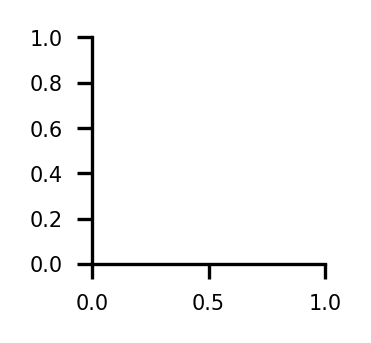

In [54]:
fig, ax = pl.subplots(1, 1, figsize=(1., 1), sharex=True, sharey=True)

values_vhpc =  np.r_[rhos_vhpc]
values_dhpc =  np.r_[rhos_dhpc]

plot_it(ax, [0], [values_vhpc], color='#FC766AFF',errs=True)
plot_it(ax, [1], [values_dhpc], color='#5B84B1FF', errs=True)
ax.set_ylim(-0.5, 1)
ax.set_xlim(-0.5, 1.5)

ax.set_xticks(np.arange(2))
ax.set_xticklabels(['vCA1', 'dCA1'])

ax.set_ylabel(r'$R^2$')

#ax.legend([Line2D('', '', color=c, lw=.5) for c in 'k', 'r'], ['Early', 'Late'])

# axs[0].text(1, 0.5, u"☆", fontsize=5, color='r', ha='center')

ax.hlines(0, -0.5, 1.5, color='0.7')

pvs = []
pvs.append(add_significance(ax, values_vhpc, values_dhpc, 0, 1, 1))


#fig.tight_layout()
fig.savefig('../figures/%s_Rsqu.pdf'%NOTEBOOK_NAME)

In [91]:
save_workspace(db)

Could not store variable 'stat_func'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pd'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...
